In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Makes plots appear inside the notebook
%matplotlib inline 

# Models we will be using.

In [2]:
# Changing the settings to display all columns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
DATA = Path('/kaggle/input/house-prices-advanced-regression-techniques')
list(DATA.iterdir())

[PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv'),
 PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt'),
 PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/train.csv'),
 PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')]

In [4]:
train = pd.read_csv(DATA/'train.csv', index_col='Id')
test = pd.read_csv(DATA/'test.csv', index_col='Id')
sampleSubmission = pd.read_csv(DATA/'sample_submission.csv')

In [5]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [7]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd        NaN   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [8]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1461         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1462         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1463         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1464         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1465         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1461       Norm     1Fam     1Story            5            6       1961   
1462       Norm     1Fam     1Story            6            6       1958   
1463       Norm     1Fam     2Story            5            5       1997   
1464       Norm     1Fam     2Story            6            6       1998   
1465       Norm   TwnhsE     1Story            8            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1461          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1462          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1463          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
1464          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1465          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1461         0.0        TA        TA     CBlock       TA       TA   
1462       108.0        TA        TA     CBlock       TA       TA   
1463         0.0        TA        TA      PConc       Gd       TA   
1464        20.0        TA        TA      PConc       TA       TA   
1465         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1461           No          Rec       468.0          LwQ       144.0   
1462           No          ALQ       923.0          Unf         0.0   
1463           No          GLQ       791.0          Unf         0.0   
1464           No          GLQ       602.0          Unf         0.0   
1465           No          ALQ       263.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1461      270.0        882.0    GasA        TA          Y      SBrkr   
1462      406.0       1329.0    GasA        TA          Y      SBrkr   
1463      137.0        928.0    GasA        Gd          Y      SBrkr   
1464      324.0        926.0    GasA        Ex          Y      SBrkr   
1465     1017.0       1280.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1461       896         0             0        896           0.0           0.0   
1462      1329         0             0       1329           0.0           0.0   
1463       928       701             0       1629           0.0           0.0   
1464       926   

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

In [10]:
def show_null_unique(df):
    unique_and_nulls = pd.DataFrame(df.dtypes, columns=['Dtype'])
    unique_and_nulls['Unique'] = df.nunique().values
    unique_and_nulls['Null'] = df.isnull().sum().values
    print(unique_and_nulls)
    
show_null_unique(train)

                 Dtype  Unique  Null
MSSubClass       int64      15     0
MSZoning        object       5     0
LotFrontage    float64     110   259
LotArea          int64    1073     0
Street          object       2     0
Alley           object       2  1369
LotShape        object       4     0
LandContour     object       4     0
Utilities       object       2     0
LotConfig       object       5     0
LandSlope       object       3     0
Neighborhood    object      25     0
Condition1      object       9     0
Condition2      object       8     0
BldgType        object       5     0
HouseStyle      object       8     0
OverallQual      int64      10     0
OverallCond      int64       9     0
YearBuilt        int64     112     0
YearRemodAdd     int64      61     0
RoofStyle       object       6     0
RoofMatl        object       8     0
Exterior1st     object      15     0
Exterior2nd     object      16     0
MasVnrType      object       3   872
MasVnrArea     float64     327     8
E

In [11]:
# A methoda to keep track of what columns that need to be converted to numerical values

def number_of_string_columns(df):
    columns = df.select_dtypes(include=["object"])
    number = 0
    string_columns = []
    for i in columns.columns:
        string_columns.append(i)
        number += 1
    print(f"Number of string columns: {number}")
    
    return string_columns
    
number_of_string_columns(train)

Number of string columns: 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
# Remove rows with missing target
train = train.dropna(axis=0, subset=['SalePrice'])

#Creating Y and X
X = train.drop(columns='SalePrice', axis=1)

y = train.SalePrice

<Axes: ylabel='Frequency'>

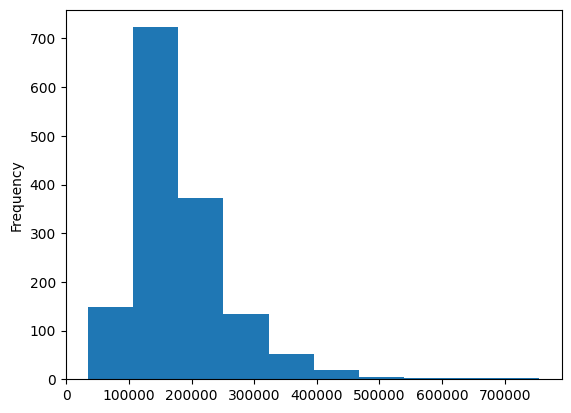

In [13]:
# Plot the frequency of sale prices.

y.plot.hist()

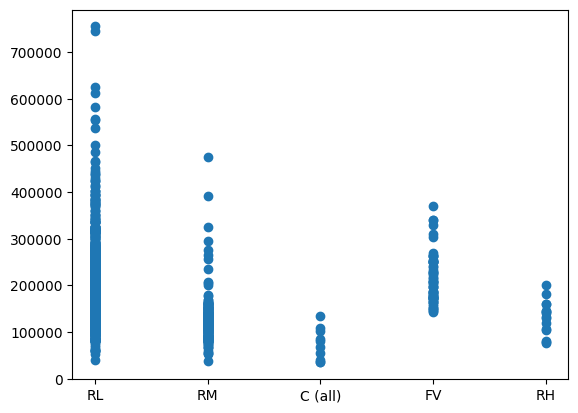

In [14]:
# From first looking at data, will do some plots that we immediately has the biggest impact on the saleprice.

# Two big factors we think can be location and age

fig, ax = plt.subplots()
ax.scatter(X["MSZoning"], y)

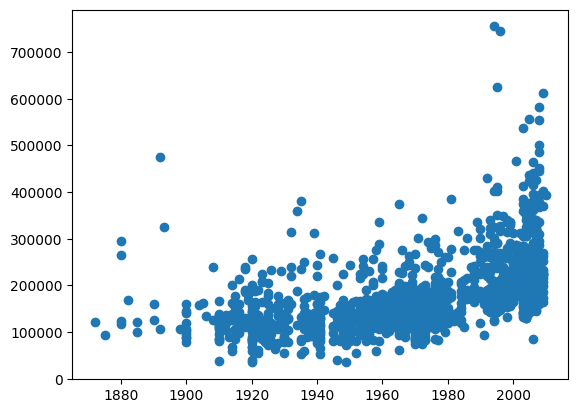

In [15]:
fig, ax = plt.subplots()
ax.scatter(X["YearBuilt"], y)

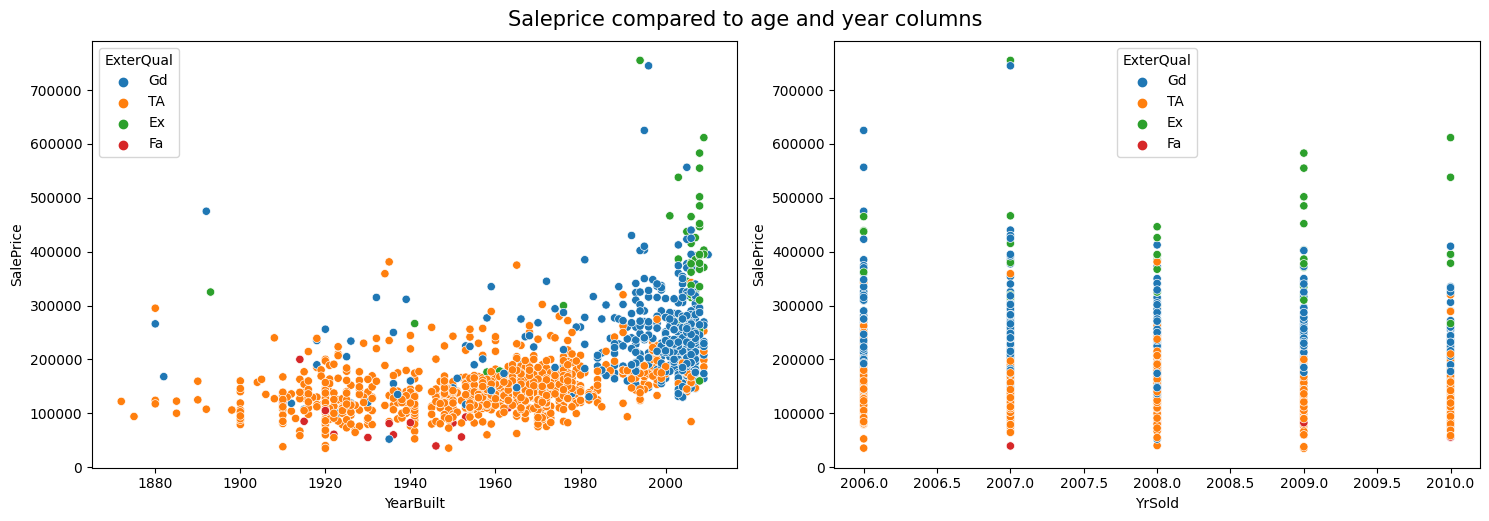

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=100)



columns = ["YearBuilt", "YrSold"]

# scatterplot
for col,i in zip(columns, [0,1]):
    sns.scatterplot(x=X.loc[:,col], y=y, ax=ax[i], hue=X.ExterQual)

fig.tight_layout()
fig.text(0.5, 1, 'Saleprice compared to age and year columns',size=15, ha="center")
plt.show()

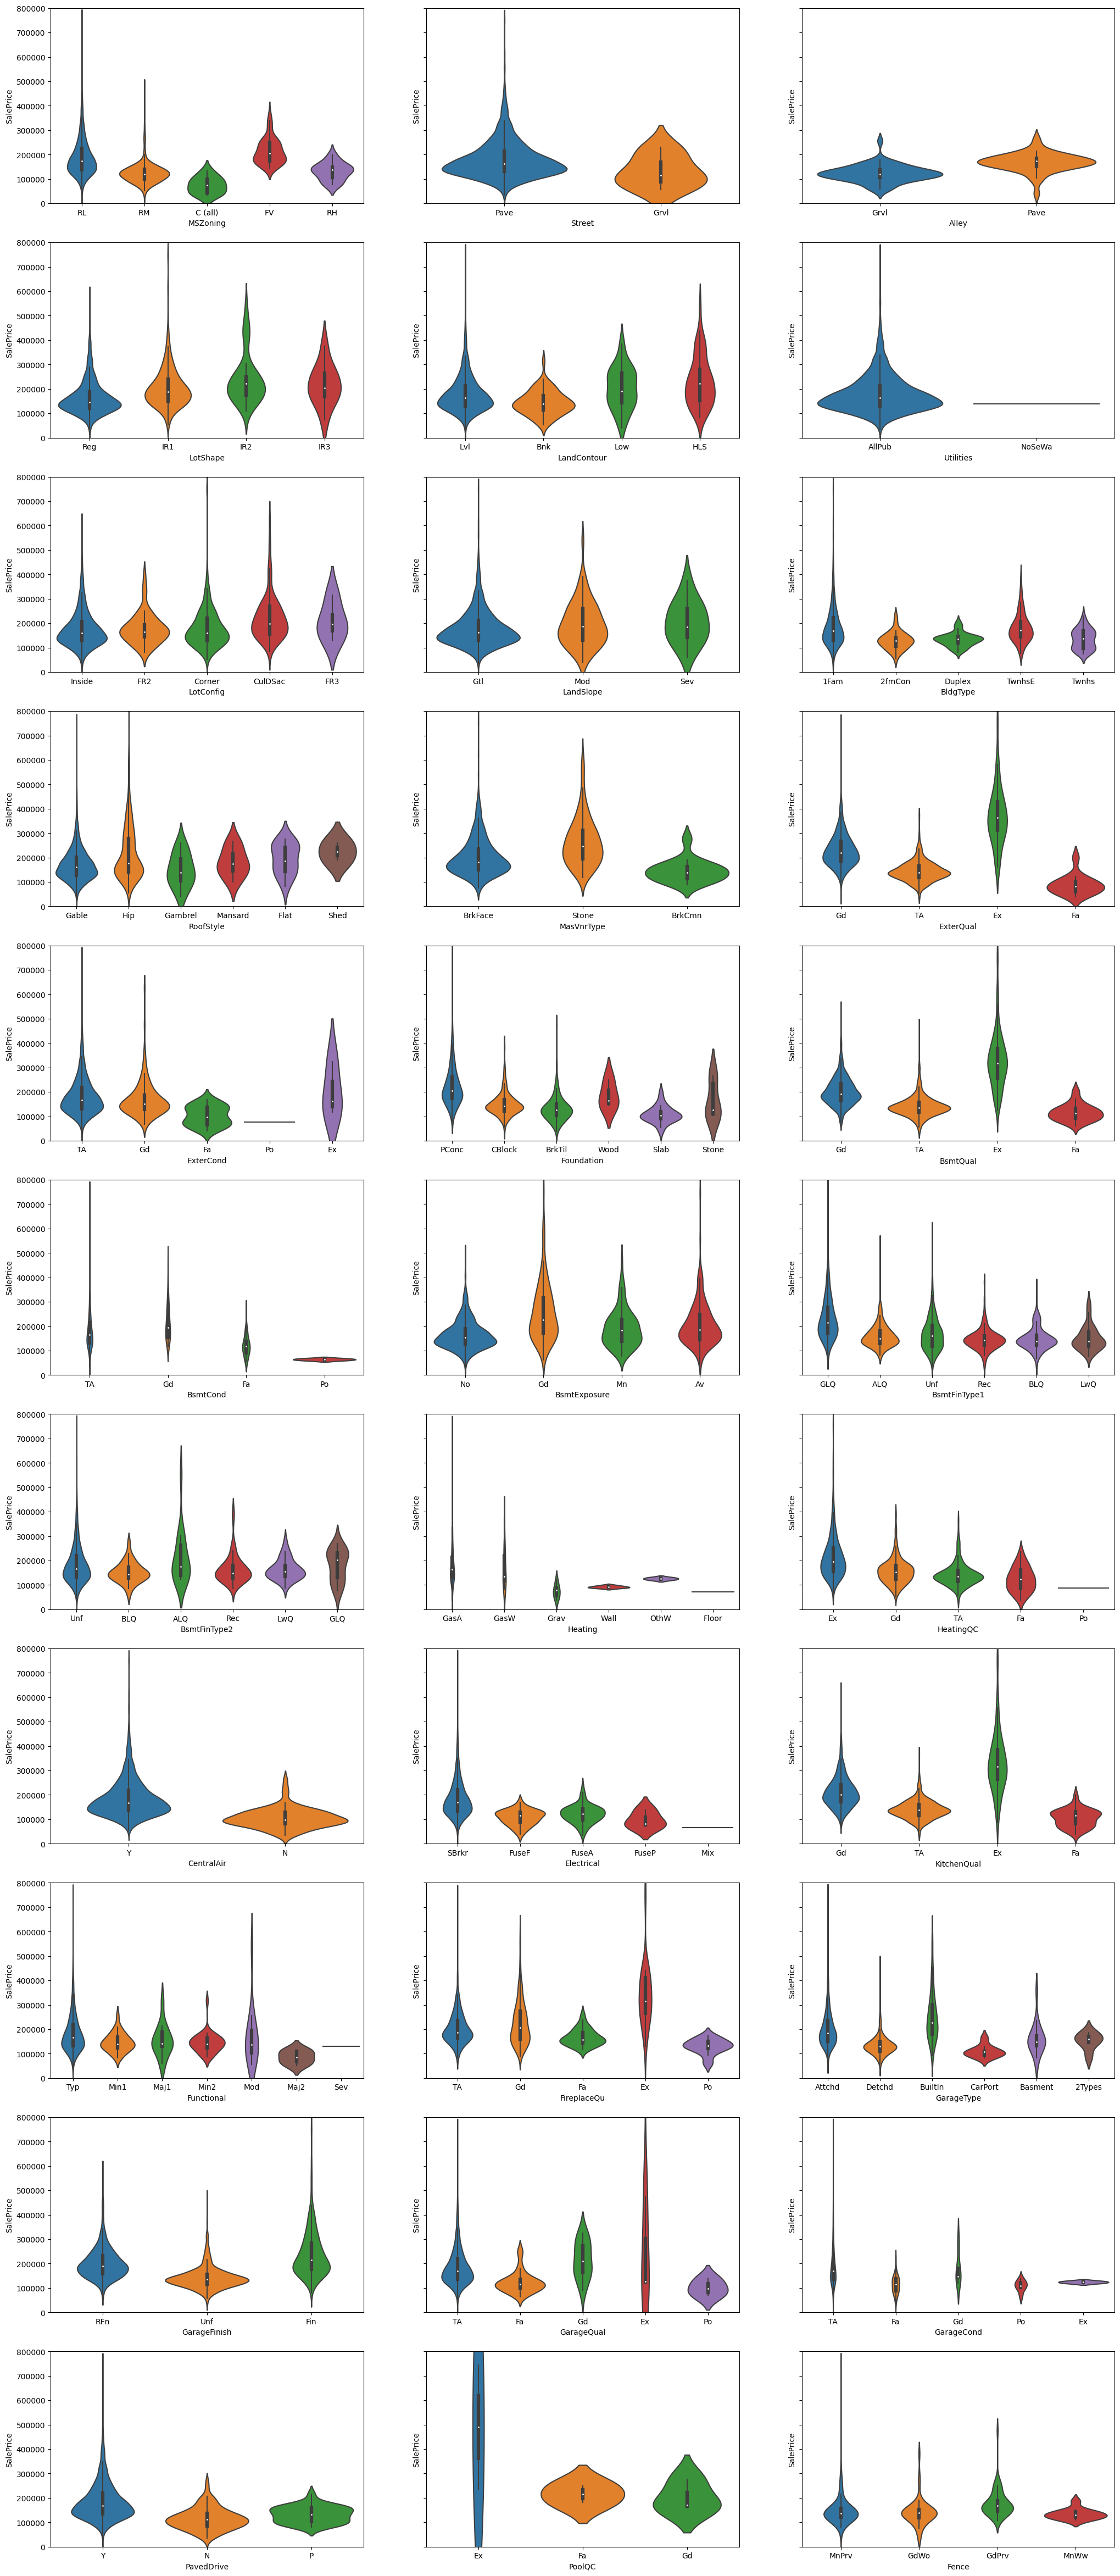

In [17]:
# Getting all columns with string values that has less than 8 unique values, gonna plot the other columns alone for readability

columns_less_than_8 = []
columns_more_than_8 = []
for i in X.select_dtypes(include=["object"]).columns:
    if len(X[i].unique()) < 8:
        columns_less_than_8.append(i)
    else:
        columns_more_than_8.append(i)
        
fig, ax = plt.subplots(int(len(columns_less_than_8) / 3), 3, figsize=(25, 60), dpi=100, sharey=True)

for column, subplot in zip(columns_less_than_8, ax.flatten()):
    # Set y axis values from 0 to 800000
    plt.ylim([0,800000])
    sns.violinplot(x=column, y=y, data=X, ax=subplot)

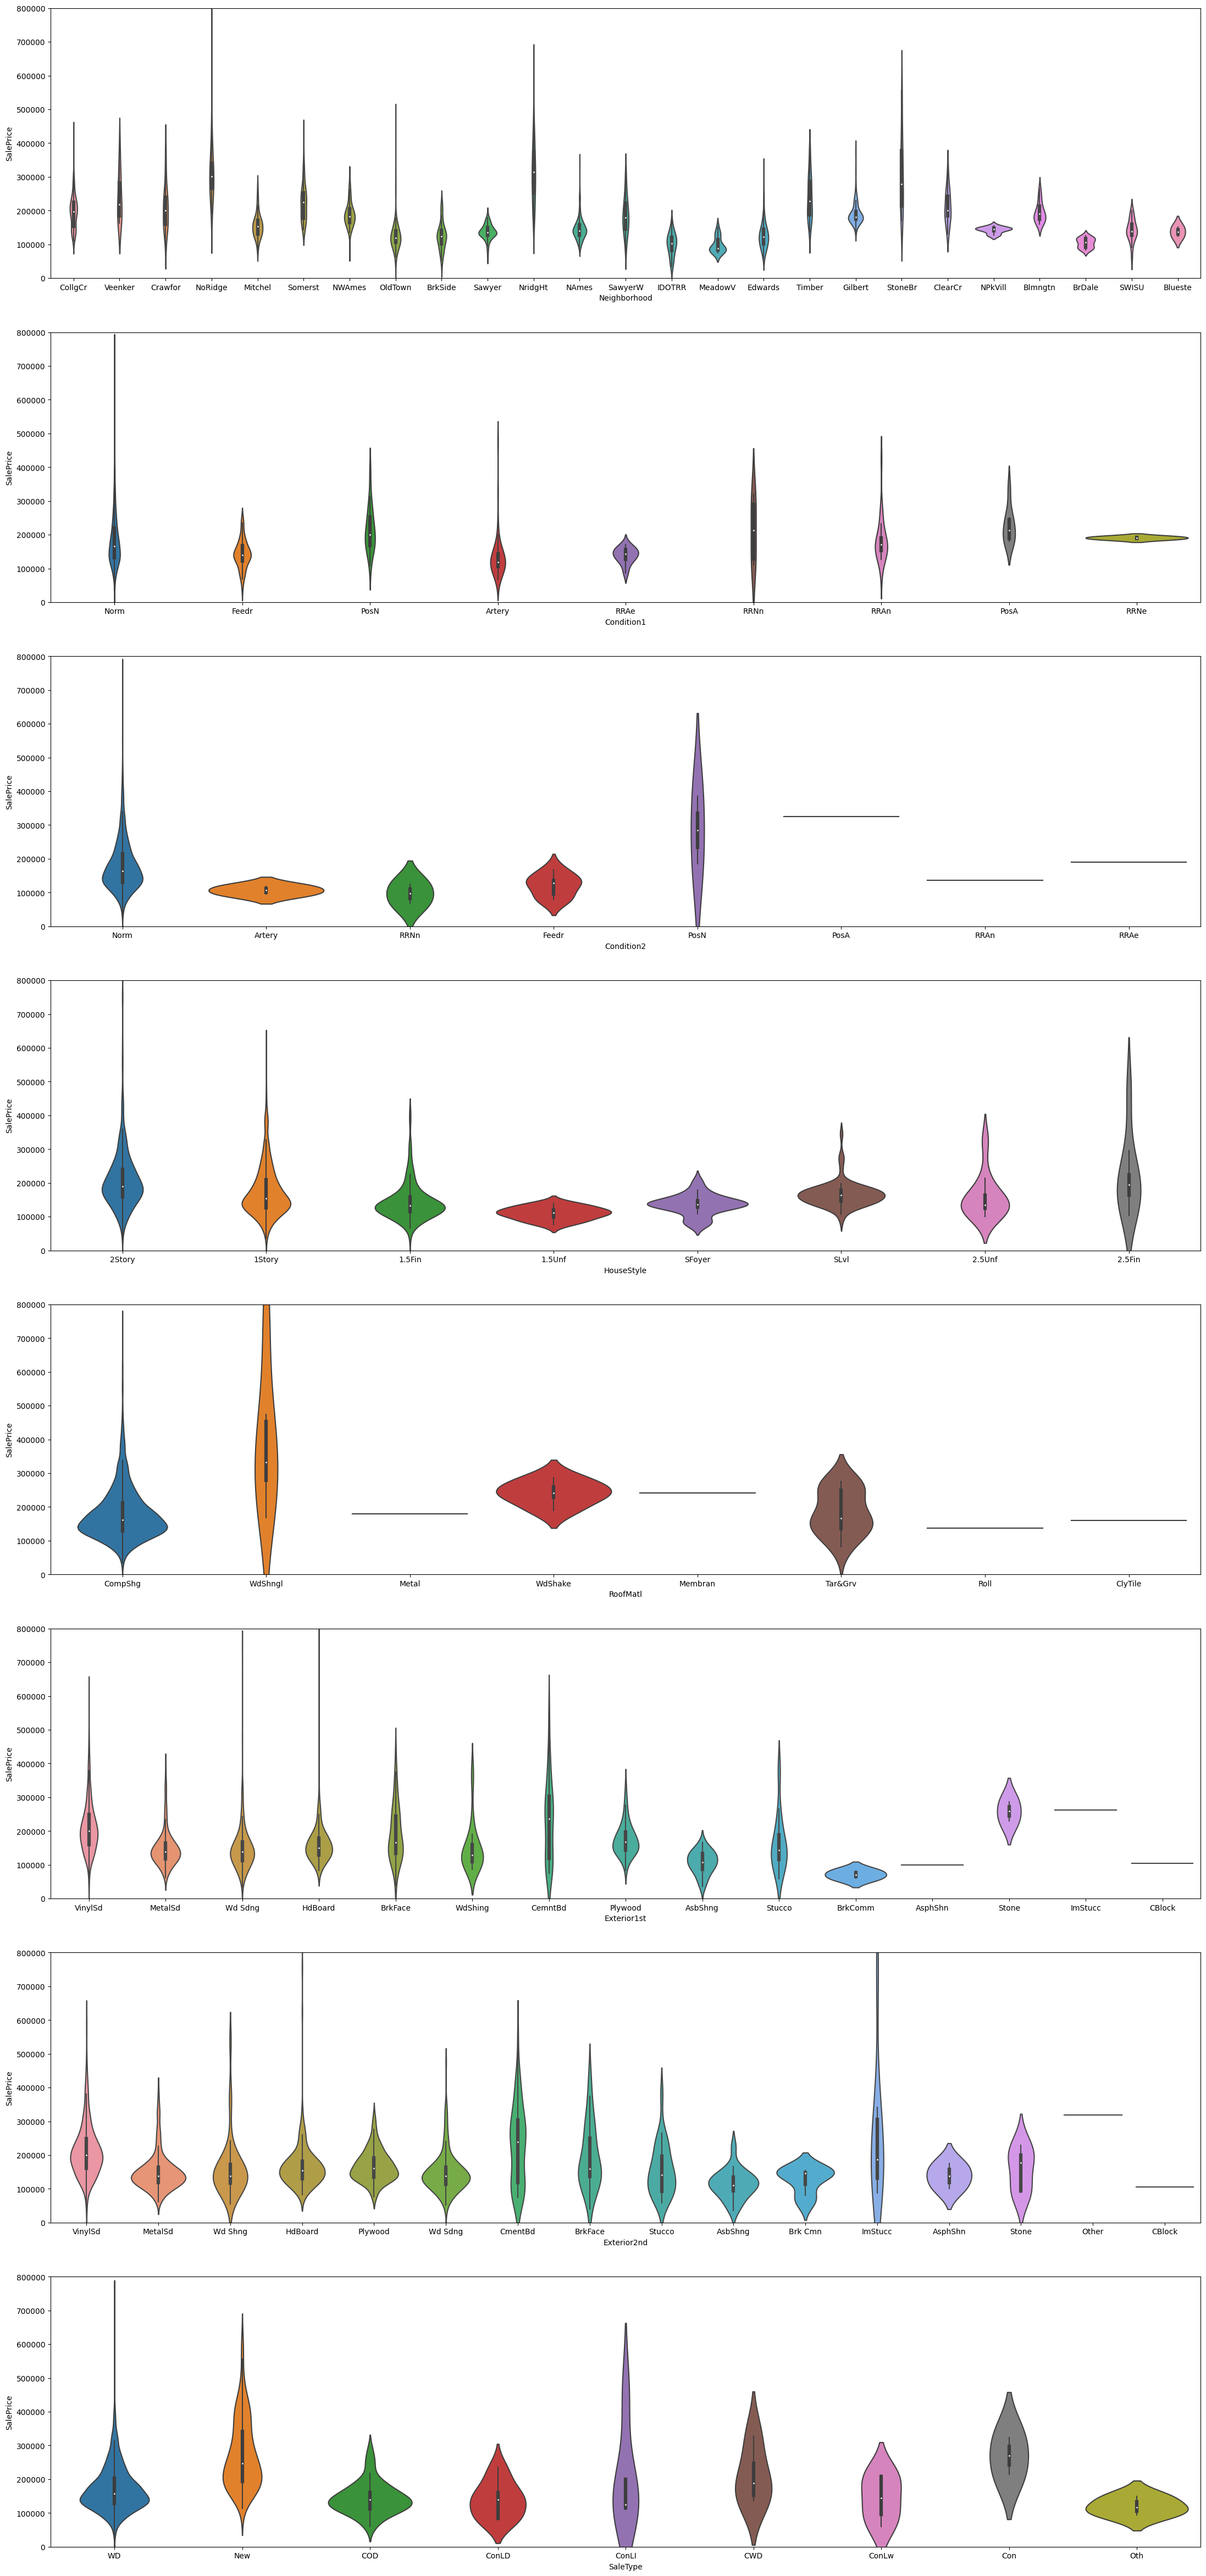

In [18]:
fig, ax = plt.subplots(int(len(columns_more_than_8) / 1), 1, figsize=(27, 60), dpi=100, sharey=True)

for column, subplot in zip(columns_more_than_8, ax.flatten()):
    plt.ylim([0,800000])
    sns.violinplot(x=column, y=y, data=X, ax=subplot)

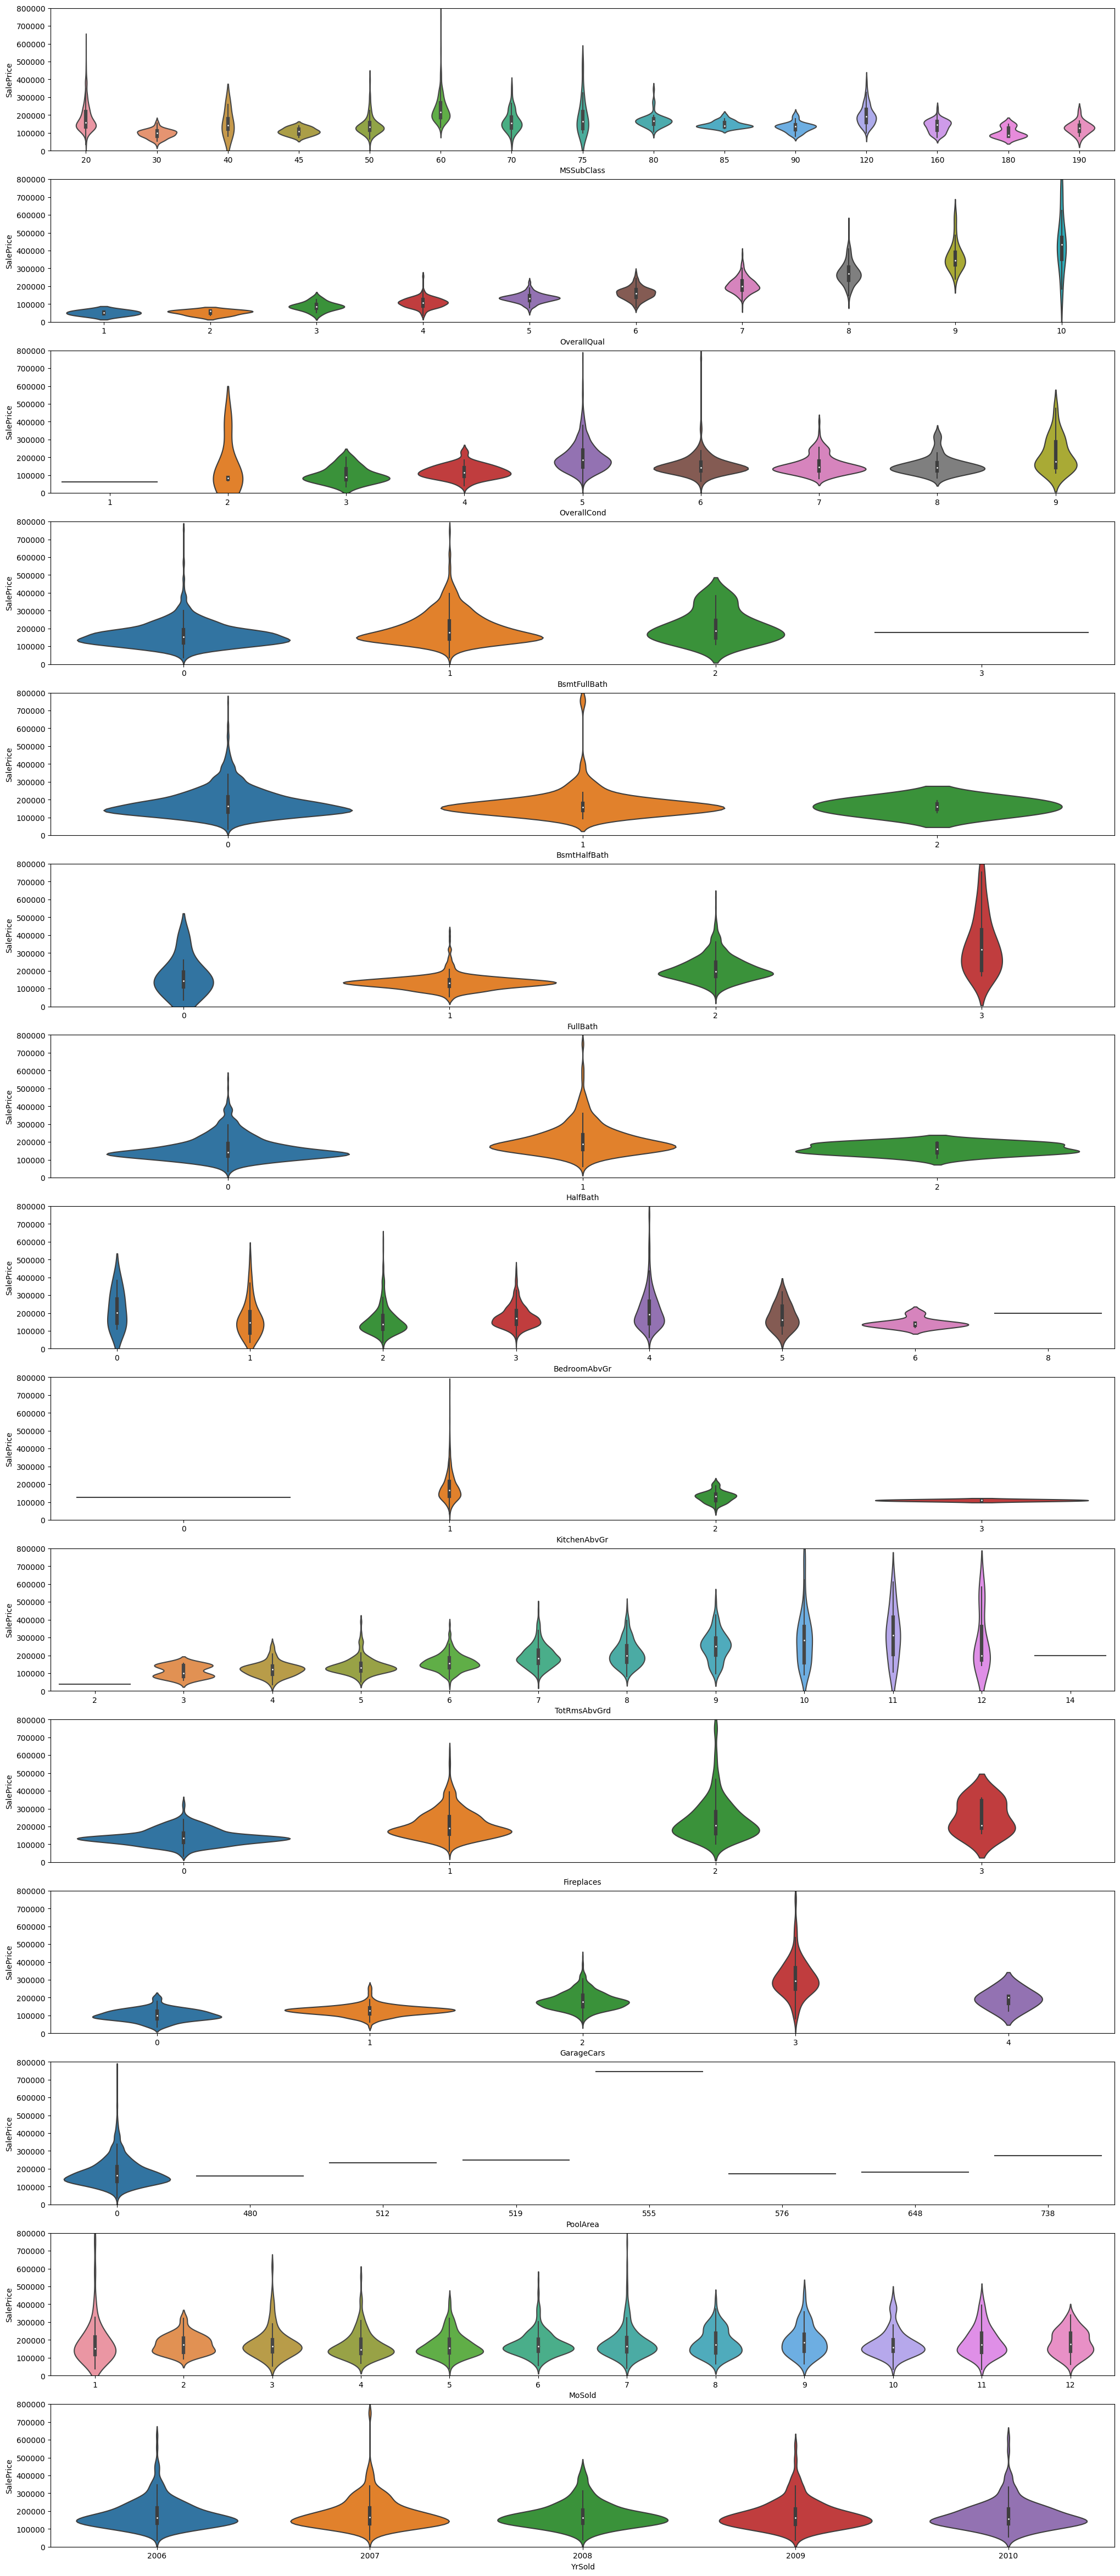

In [19]:
# We also wanted to take a look at some violin plots with columns of int values, but will only include those with few unique values.

columns_less_than_16 = []

for i in X.select_dtypes(include=["int64"]).columns:
    if len(X[i].unique()) < 16:
        columns_less_than_16.append(i)
        
fig, ax = plt.subplots(int(len(columns_less_than_16) / 1), 1, figsize=(25, 60), dpi=100, sharey=True)

for column, subplot in zip(columns_less_than_16, ax.flatten()):
    plt.ylim([0,800000])
    sns.violinplot(x=column, y=y, data=X, ax=subplot)

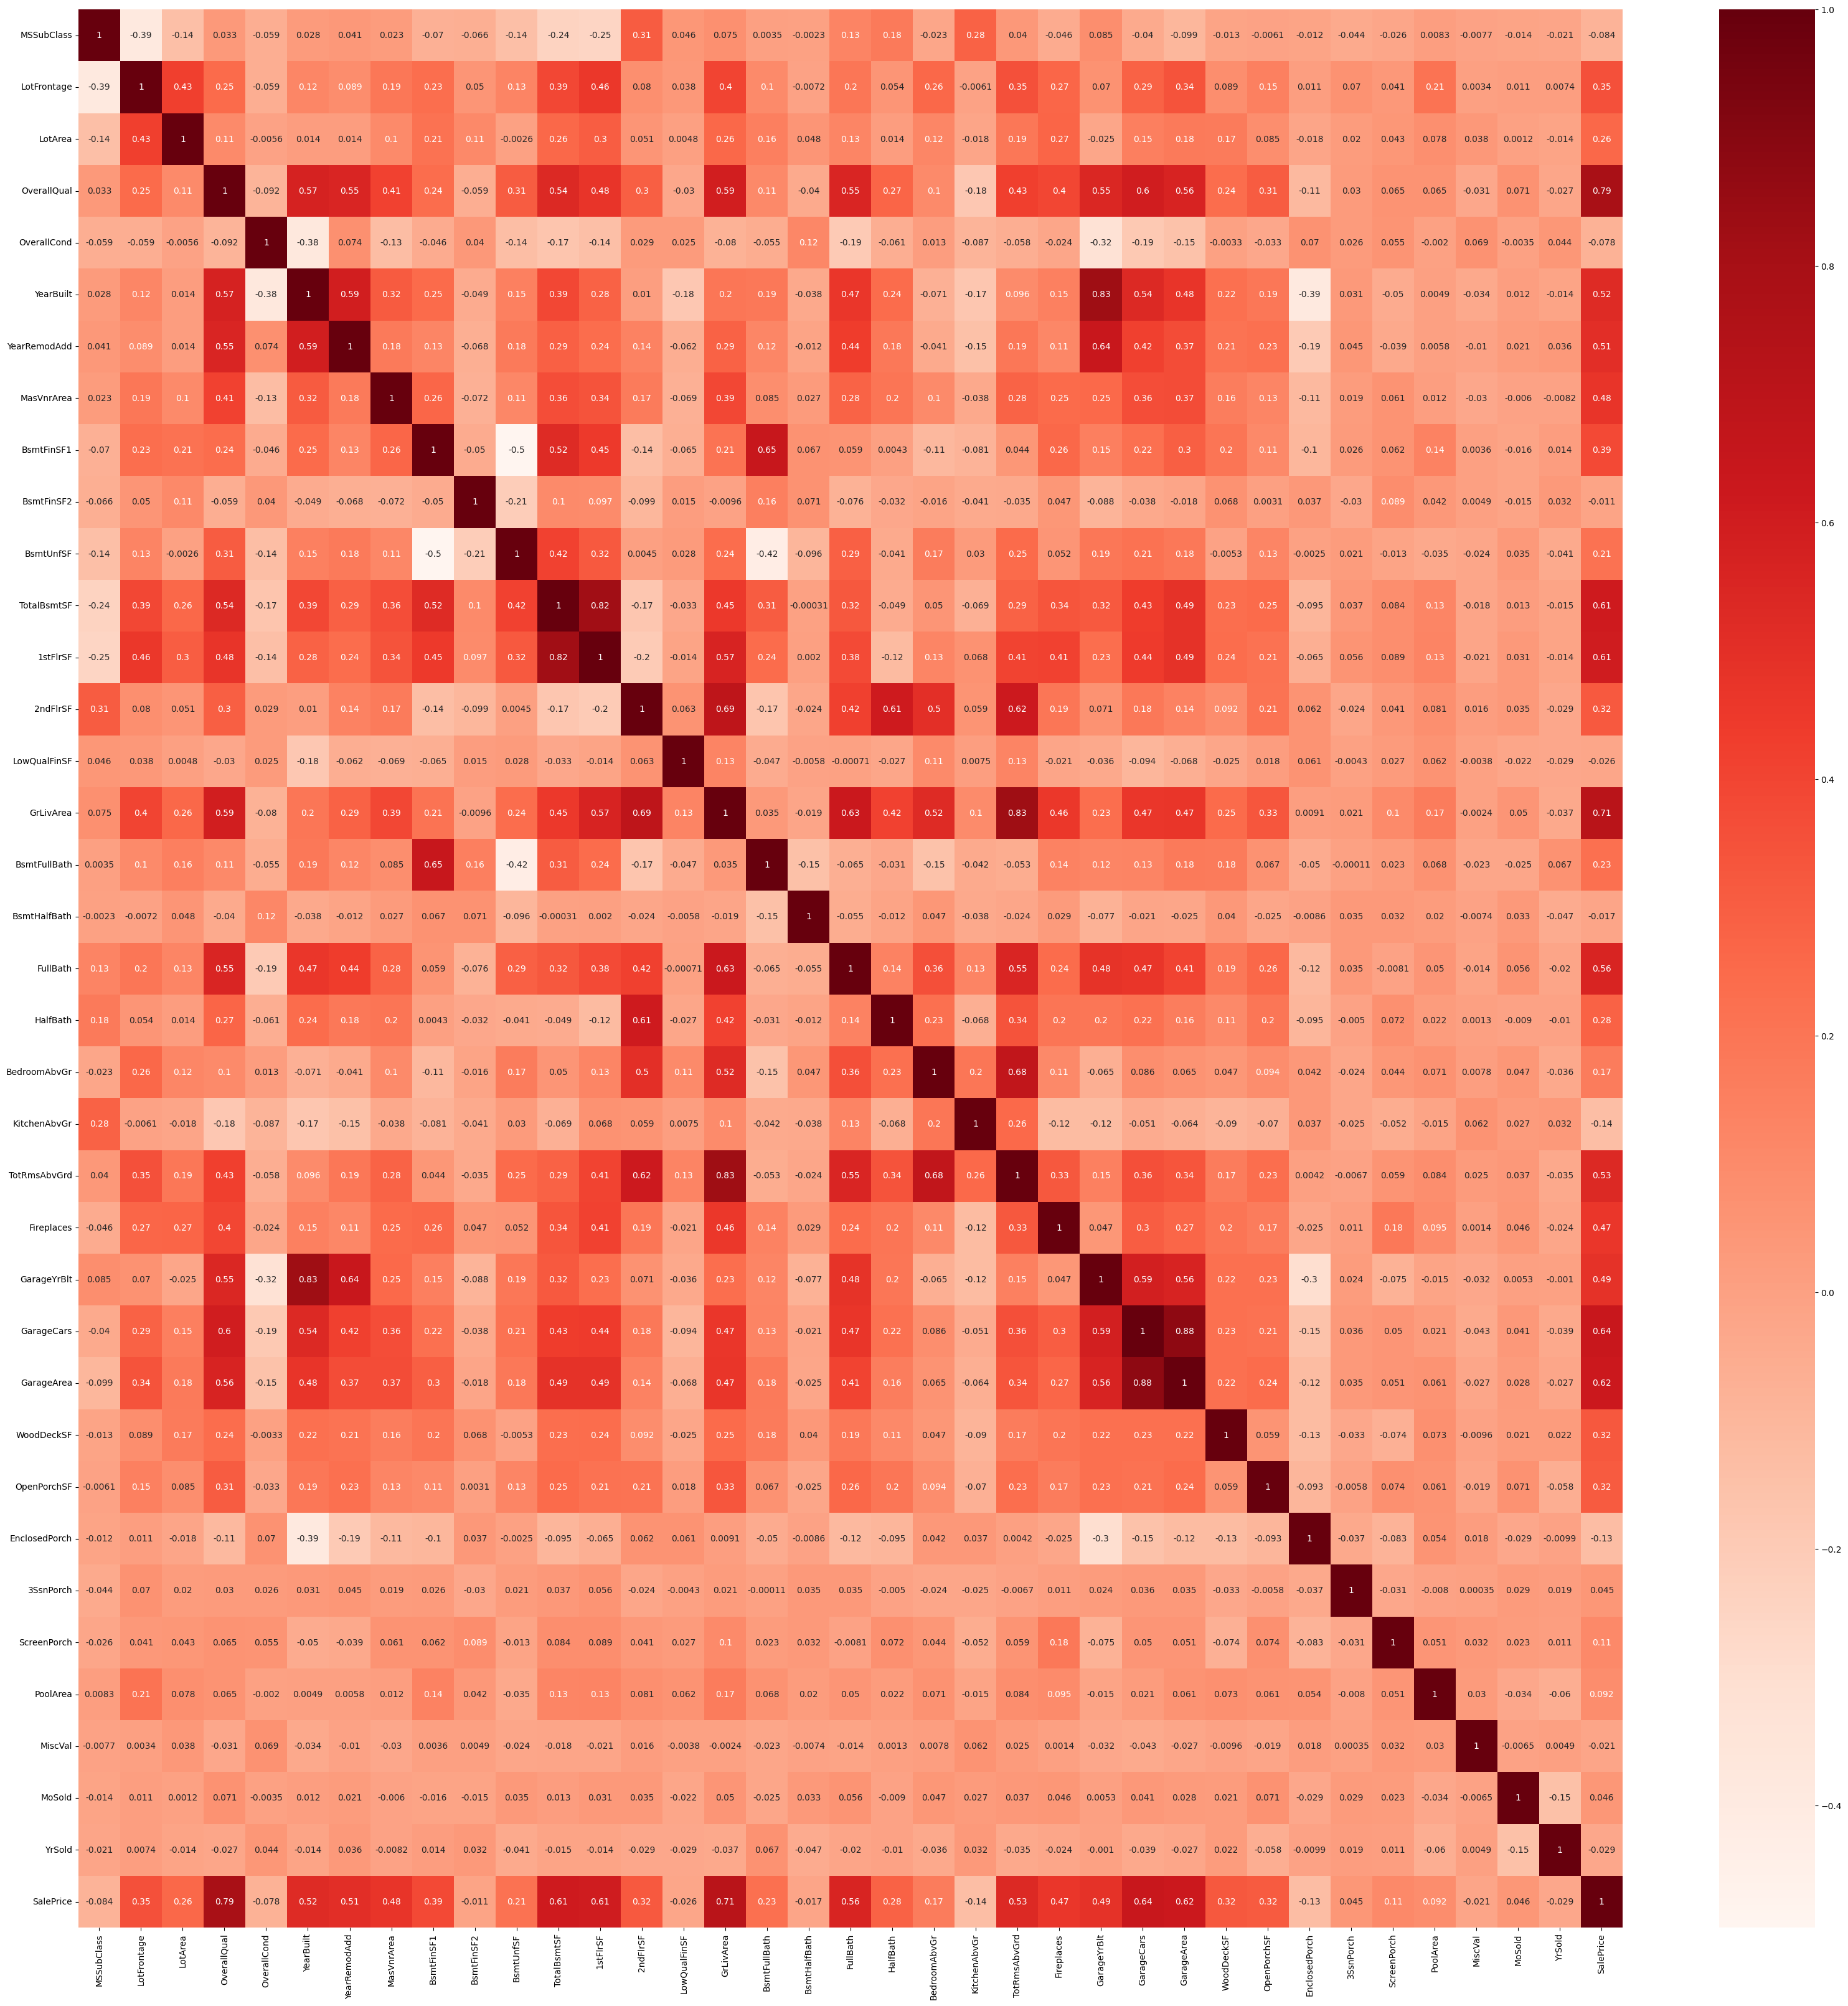

In [20]:
# Assuming 'train' is your DataFrame
# Drop non-numeric columns
numeric_train = train.select_dtypes(include=[np.number])

# Calculate correlation
cor = numeric_train.corr()

# Plot the correlation matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
test_1 = test

string_columns = X.select_dtypes(include=["object"])

quality_columns = []

for i in string_columns:
    if ("GD" in X[i].unique()) or ("Ex" in X[i].unique()) or ("Po" in X[i].unique()) or ("LwQ" in X[i].unique()) or ("Reg" in X[i].unique()) or ("Unf" in X[i].unique()) or ("Typ" in X[i].unique()):
        quality_columns.append(i)
        
# Some of these categories contain NaN values, we will replace this with a string "NA"
X.loc[:,quality_columns] = X.loc[:,quality_columns].fillna('NA')
test_1.loc[:,quality_columns] = test_1.loc[:,quality_columns].fillna('NA')

print("Columns with quality or conditional values:\n") 
nmbr_of_columns = 0
for i in quality_columns:
    nmbr_of_columns += 1
    print(f"{i} : {X[i].unique()}")
    
print(f"\nNumber of columns: {nmbr_of_columns}")

Columns with quality or conditional values:

LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
ExterQual : ['Gd' 'TA' 'Ex' 'Fa']
ExterCond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual : ['Gd' 'TA' 'Ex' 'NA' 'Fa']
BsmtCond : ['TA' 'Gd' 'NA' 'Fa' 'Po']
BsmtFinType1 : ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
BsmtFinType2 : ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC : ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual : ['Gd' 'TA' 'Ex' 'Fa']
Functional : ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
FireplaceQu : ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish : ['RFn' 'Unf' 'Fin' 'NA']
GarageQual : ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
GarageCond : ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
PoolQC : ['NA' 'Ex' 'Fa' 'Gd']

Number of columns: 15


In [22]:
columns1 = ["FireplaceQu", "GarageQual", "GarageCond"]
X.loc[:,columns1] = X.loc[:,columns1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])
test_1.loc[:,columns1] = test_1.loc[:,columns1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])


columns2 = ["PoolQC"]
X.loc[:,columns2] = X.loc[:,columns2].replace(['NA', 'Fa', 'Gd', 'Ex'], [0,1,2,3])
test_1.loc[:,columns2] = test_1.loc[:,columns2].replace(['NA', 'Fa', 'Gd', 'Ex'], [0,1,2,3])


columns3 = ["KitchenQual", "ExterQual"]
X.loc[:,columns3] = X.loc[:,columns3].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])
test_1.loc[:,columns3] = test_1.loc[:,columns3].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])


columns4 = ["HeatingQC", "ExterCond"]
X.loc[:,columns4] = X.loc[:,columns4].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])
test_1.loc[:,columns4] = test_1.loc[:,columns4].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])


columns5 = ["BsmtFinType1", "BsmtFinType2"]
X.loc[:,columns5] = X.loc[:,columns5].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])
test_1.loc[:,columns5] = test_1.loc[:,columns5].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])


columns6 = ["BsmtCond"]
X.loc[:,columns6] = X.loc[:,columns6].replace(['NA', 'Po', 'Fa', 'TA', 'Gd'], [0,1,2,3,4])
test_1.loc[:,columns6] = test_1.loc[:,columns6].replace(['NA', 'Po', 'Fa', 'TA', 'Gd'], [0,1,2,3,4])

columns7 = ["BsmtQual"]
X.loc[:,columns7] = X.loc[:,columns7].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])
test_1.loc[:,columns7] = test_1.loc[:,columns7].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])

columns8 = ["LotShape"]
X.loc[:,columns8] = X.loc[:,columns8].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])
test_1.loc[:,columns8] = test_1.loc[:,columns8].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])


columns9 = ["GarageFinish"]
X.loc[:,columns9] = X.loc[:,columns9].replace(['NA', 'Unf', 'RFn', 'Fin' ], [0,1,2,3])
test_1.loc[:,columns9] = test_1.loc[:,columns9].replace(['NA', 'Unf', 'RFn', 'Fin' ], [0,1,2,3])


columns10 = ["Functional"]
X.loc[:,columns10] = X.loc[:,columns10].replace(['NA', "Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], [0,1,2,3,4,5,6,7,8])
test_1.loc[:,columns10] = test_1.loc[:,columns10].replace(['NA', "Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], [0,1,2,3,4,5,6,7,8])

columns11 = ["PavedDrive"]
X.loc[:,columns11] = X.loc[:,columns11].replace(["N", "P", "Y"], [0,1,2])
test_1.loc[:,columns11] = test_1.loc[:,columns11].replace(["N", "P", "Y"], [0,1,2])

In [23]:
print(number_of_string_columns(X))
print(number_of_string_columns(test_1))

Number of string columns: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Number of string columns: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'H

In [24]:
columns = number_of_string_columns(X)

for i in columns:
    print("*" * 60)
    print(f"Column: {i} ")
    print(X[i].value_counts(normalize=True, ascending=False))
    print("\n")

Number of string columns: 43
************************************************************
Column: MSZoning 
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64


************************************************************
Column: Street 
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64


************************************************************
Column: Alley 
Alley
Grvl    0.549451
Pave    0.450549
Name: proportion, dtype: float64


************************************************************
Column: LotShape 
LotShape
0    0.633562
1    0.331507
2    0.028082
3    0.006849
Name: proportion, dtype: float64


************************************************************
Column: LandContour 
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64


************************************************************
Column: Utili

In [25]:
X = X.drop(columns="Utilities", axis=1)
test_1 = test_1.drop(columns="Utilities", axis=1)

X = X.drop(columns="Street", axis=1)
test_1 = test_1.drop(columns="Street", axis=1)

X = X.drop(columns="MiscFeature", axis=1)
test_1 = test_1.drop(columns="MiscFeature", axis=1)

X = X.drop(columns="MiscVal", axis=1)
test_1 = test_1.drop(columns="MiscVal", axis=1)

In [26]:
columns = number_of_string_columns(X)

for column in columns:
    X[column] = X[column].mask(X[column].map(X[column].value_counts(normalize=True)) < 0.01, 'Other')
    test_1[column] = test_1[column].mask(test_1[column].map(test_1[column].value_counts(normalize=True)) < 0.01, 'Other')

Number of string columns: 40


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming X is your DataFrame
X_1 = X.copy()

# Identify columns with mixed data types
mixed_type_columns = X_1.select_dtypes(include=['object']).columns
print(mixed_type_columns)

# Convert columns with mixed types to strings
X_1[mixed_type_columns] = X_1[mixed_type_columns].astype(str)

# One-hot encode non-numeric columns
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
one_hot_encoder_transformer = ColumnTransformer([
    ("one_hot", encoder, mixed_type_columns)
], remainder="passthrough")

X_1 = pd.DataFrame(one_hot_encoder_transformer.fit_transform(X_1))
# Note: The same transformer should be used on the test set
test_onehot = pd.DataFrame(one_hot_encoder_transformer.transform(test_1))

print(X_1.shape, test_onehot.shape, y.shape)

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')
(1460, 241) (1459, 241) (1460,)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
columns = number_of_string_columns(X)
  
for i in columns:
    X[i]= pd.Categorical(X[i]).codes
    test_1[i] = pd.Categorical(test_1[i]).codes

X.shape, test_1.shape

Number of string columns: 40


((1460, 75), (1459, 75))

In [29]:
def rmissingvaluecol(dff, threshold, newValue):
    # Calculate the percentage of missing values for each column
    missing_percentages = 100 * (dff.isnull().sum() / len(dff))

    # Identify columns with missing values above the threshold
    columns_to_drop = missing_percentages[missing_percentages >= threshold].index.tolist()

    # Drop columns with too many missing values
    dff.drop(columns=columns_to_drop, inplace=True)

    print("# Columns having more than %s percent missing values:" % threshold, len(columns_to_drop))

    # Fill missing values in the remaining columns with the specified newValue
    dff.fillna(newValue, inplace=True)

# Example usage
rmissingvaluecol(X, 0.01, 0)
# rmissingvaluecol(X_final, 0.01, 0)
# rmissingvaluecol(test_1, 0.01, 0)

# Columns having more than 0.01 percent missing values: 3


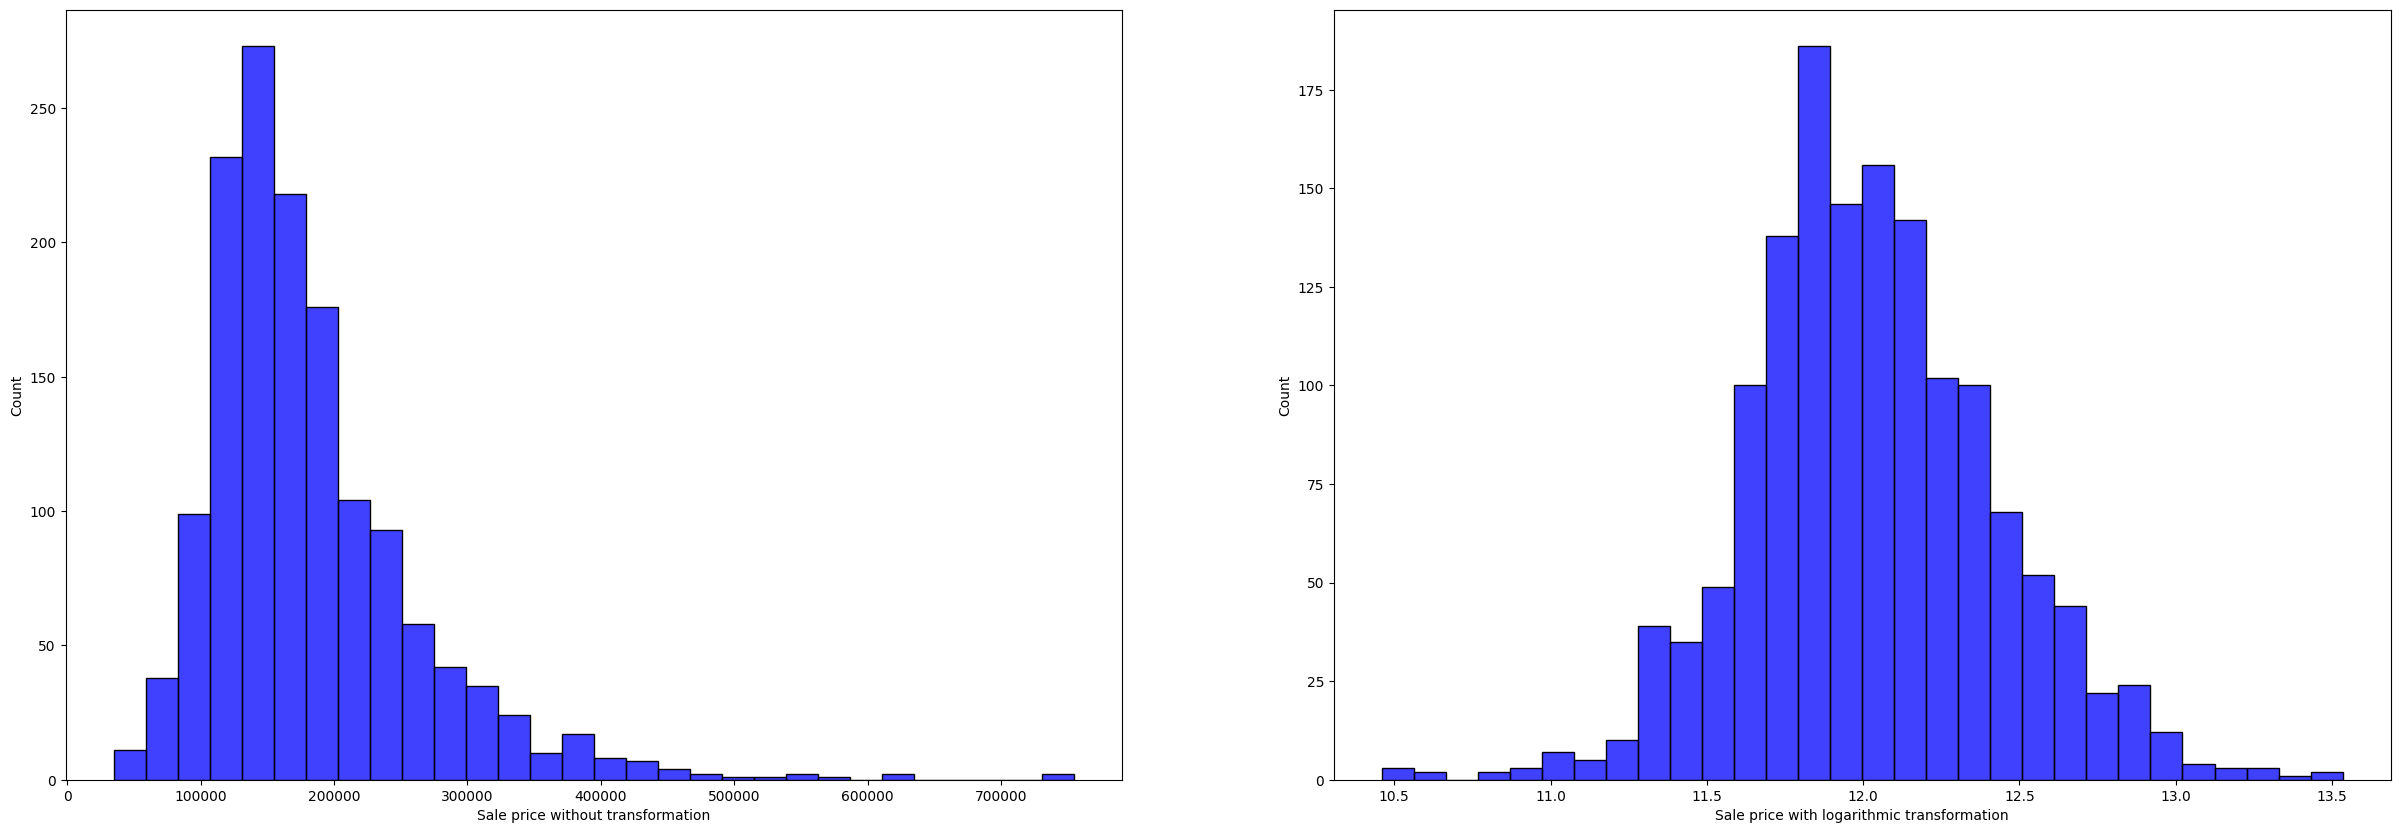

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.histplot(train['SalePrice'], kde=False, color='blue', bins=30, ax=ax[0])
sns.histplot(np.log(train['SalePrice']), kde=False, color='blue', bins=30, ax=ax[1])

ax[0].set_xlabel("Sale price without transformation")
ax[1].set_xlabel("Sale price with logarithmic transformation")

plt.show()

In [31]:
from sklearn.metrics import mean_squared_error as mse
# Creating a function that can compare different datasets, in this case i will compare the simple onehotencoder solution to the more manual approach
def test_dataset(data, label):
    
    print(f"Model scores for data: {label}")
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2 , random_state=1)

    
    # XGB Regressor
    
    xgb = XGBRegressor(eval_metric="rmse")

    xgb.fit(X_train, y_train)

    Y_pred =  xgb.predict(X_test)

    print("--------------------------------------------")
    print("XGB Regressor scores:")
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))

    
    # Random Forest 
    
    RFR_pipeline = Pipeline([
    ("RFR Regression", RandomForestRegressor())
    ])

    RFR_pipeline.fit(X_train, y_train)

    Y_pred = RFR_pipeline.predict(X_test)
    print("--------------------------------------------")
    print("Random Forest Regressor scores:")
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))
    
    # SGD Regressor 
    
    SGD_pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("SGD Regression", SGDRegressor())
    ])


    SGD_pipeline.fit(X_train, y_train)

    Y_pred = SGD_pipeline.predict(X_test)
    print("--------------------------------------------")
    print("SGD_Regressor scores:")
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))
    
    # Ridge regression
    
    alpha = 0.1

    Ridge_pipeline = Pipeline([
        ("Ridge:", Ridge(alpha=alpha))
    ])

    Ridge_pipeline.fit(X_train, y_train)

    Y_pred = Ridge_pipeline.predict(X_test)

    print("--------------------------------------------")
    print("Ridge Regression scores with alpha: " + str(alpha))
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))
    
    print("--------------------------------------------")
    
    lasso = Lasso(alpha=0.1)
    
    lasso.fit(X_train, y_train)

    Y_pred = lasso.predict(X_test)

    print("--------------------------------------------")
    print("Lasso scores with alpha: ")
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))
    
    print("--------------------------------------------")
    print("\n\n")
            

#test_dataset(X, "OneHotEncoder Dataset")
test_dataset(X, "Manual")

Model scores for data: Manual
--------------------------------------------
XGB Regressor scores:
Mean Absolute Error:  15873.871709118152
R2 score:  0.9314534199838236
--------------------------------------------
Random Forest Regressor scores:
Mean Absolute Error:  16309.149897260279
R2 score:  0.8972410950881736
--------------------------------------------
SGD_Regressor scores:
Mean Absolute Error:  21065.70351212692
R2 score:  0.8075972116018507
--------------------------------------------
Ridge Regression scores with alpha: 0.1
Mean Absolute Error:  19447.632134629144
R2 score:  0.8224379945235063
--------------------------------------------
--------------------------------------------
Lasso scores with alpha: 
Mean Absolute Error:  19345.651322639464
R2 score:  0.81910985578162
--------------------------------------------





In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)

In [33]:
xgb = XGBRegressor(eval_metric='rmse')

param_grid = [
    {'subsample': [0.5], 'n_estimators': [1400], 
     'max_depth': [5], 'learning_rate': [0.02],
     'colsample_bytree': [0.4], 'colsample_bylevel': [0.5],
     'reg_alpha':[1], 'reg_lambda': [1], 'min_child_weight':[2]}
]

grid_search = GridSearchCV(xgb, param_grid, cv=3, verbose=1, scoring='neg_root_mean_squared_error')

# First fitting final model with same data to compare scores.
grid_search.fit(X_train, y_train)

Y_pred =  grid_search.predict(X_test)

print("--------------------------------------------")
print("XGB Regressor with GridSearchCV scores:")
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
print('R2 score: ', r2_score(y_test, Y_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
--------------------------------------------
XGB Regressor with GridSearchCV scores:
Mean Absolute Error:  13813.950208690068
R2 score:  0.9254355224138429


In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Create the base model to tune
# Explicitly set max_features to avoid FutureWarning
rf = RandomForestRegressor(max_features='auto')

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=3, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

# Make predictions on the test set
Y_pred = rf_random.predict(X_test)

# Print evaluation metrics
print("--------------------------------------------")
print("Random Forest with RandomizedSearchCV scores:")
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
print('R2 score: ', r2_score(y_test, Y_pred))


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

--------------------------------------------
Random Forest with RandomizedSearchCV scores:
Mean Absolute Error:  16528.031663997186
R2 score:  0.8684247086852644


In [35]:
final_model = grid_search

In [36]:
final_model.fit(X, np.log(y));

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [37]:
print("RMSLE on training data: ",round(-final_model.score(X, np.log(y)),4))
print("RMSLE on validation data: ",round(-final_model.best_score_,4))
print("\n")
print("MSE on training data: ",mse(final_model.predict(X_train), y_train, squared=True) * 10000000)
print("MSE on validation data:",mse(final_model.predict(X_test), y_test, squared=True) * 10000000)

RMSLE on training data:  0.0716
RMSLE on validation data:  0.1273


MSE on training data:  3.928765517153168e+17
MSE on validation data: 3.8023679210925005e+17


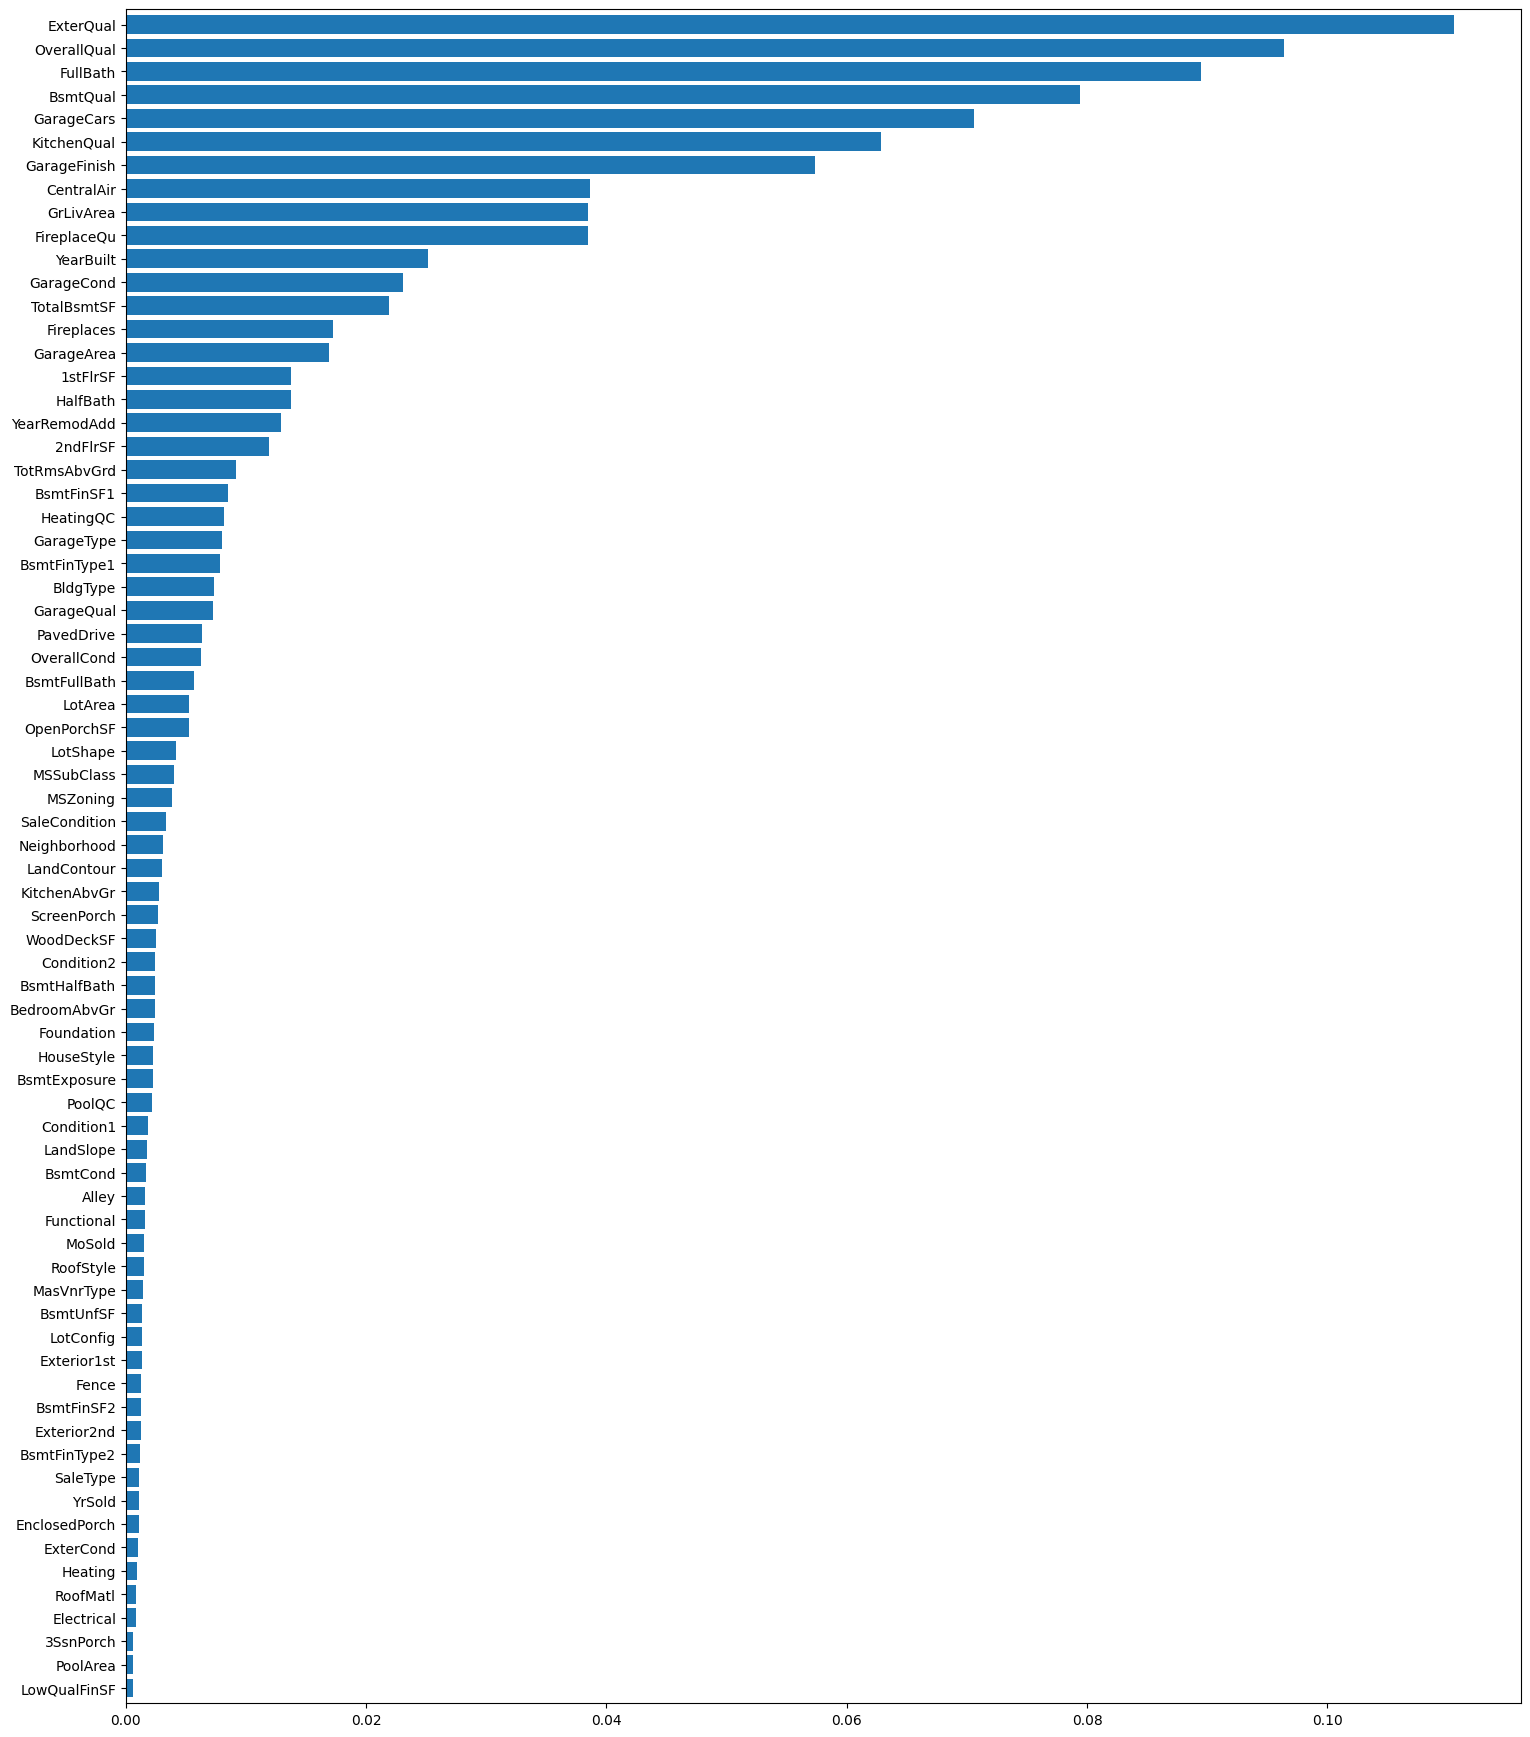

In [38]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance_sorted = pd.Series(feature_importance,X.columns).sort_values(ascending=True)

# Plot horizaontal bar plot
plt.figure(figsize=(18,22))
ax = feature_importance_sorted.plot.barh(width=0.8)
plt.show()

In [39]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class ColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print("init called")
        
    def fit(self, X, y=None):
        print("fit called")
        return self
    
    def transform(self, X):
        print("transform called")
        
        quality_columns = []
        
        string_columns = X.select_dtypes(include=["object"])

        for i in string_columns:
            if ("GD" in X[i].unique()) or ("Ex" in X[i].unique()) or ("Po" in X[i].unique()) or ("LwQ" in X[i].unique()) or ("Reg" in X[i].unique()) or ("Unf" in X[i].unique()) or ("Typ" in X[i].unique()):
                quality_columns.append(i)

        # Some of these categories contain NaN values, we will replace this with a string "NA"
        X.loc[:,quality_columns] = X.loc[:,quality_columns].fillna('NA')
        
        columns1 = ["FireplaceQu", "GarageQual", "GarageCond"]
        X.loc[:,columns1] = X.loc[:,columns1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])

        columns2 = ["PoolQC"]
        X.loc[:,columns2] = X.loc[:,columns2].replace(['NA', 'Fa', 'Gd', 'Ex'], [0,1,2,3])

        columns3 = ["KitchenQual", "ExterQual"]
        X.loc[:,columns3] = X.loc[:,columns3].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])

        columns4 = ["HeatingQC", "ExterCond"]
        X.loc[:,columns4] = X.loc[:,columns4].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])

        columns5 = ["BsmtFinType1", "BsmtFinType2"]
        X.loc[:,columns5] = X.loc[:,columns5].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])

        columns6 = ["BsmtCond"]
        X.loc[:,columns6] = X.loc[:,columns6].replace(['NA', 'Po', 'Fa', 'TA', 'Gd'], [0,1,2,3,4])

        columns7 = ["BsmtQual"]
        X.loc[:,columns7] = X.loc[:,columns7].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])
      
        columns8 = ["LotShape"]
        X.loc[:,columns8] = X.loc[:,columns8].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])
        
        columns9 = ["GarageFinish"]
        X.loc[:,columns9] = X.loc[:,columns9].replace(['NA', 'Unf', 'RFn', 'Fin' ], [0,1,2,3])
       
        columns10 = ["Functional"]
        X.loc[:,columns10] = X.loc[:,columns10].replace(['NA', "Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], [0,1,2,3,4,5,6,7,8])
        

        columns11 = ["PavedDrive"]
        X.loc[:,columns11] = X.loc[:,columns11].replace(["N", "P", "Y"], [0,1,2])
        
        # Dropping columns
        X = X.drop(columns="Utilities", axis=1)
        X = X.drop(columns="Street", axis=1)
        X = X.drop(columns="MiscFeature", axis=1)
        X = X.drop(columns="MiscVal", axis=1)

        
        # Converting low frequency to other
        columns = number_of_string_columns(X)

        for column in columns:
            X[column] = X[column].mask(X[column].map(X[column].value_counts(normalize=True)) < 0.01, 'Other')
            test_1[column] = test_1[column].mask(test_1[column].map(test_1[column].value_counts(normalize=True)) < 0.01, 'Other')

        
        # Label encoding
        columns = number_of_string_columns(X)
  
        for i in columns:
            X[i]= pd.Categorical(X[i]).codes
            test_1[i] = pd.Categorical(test_1[i]).codes
            
        
        # fixing nan values
        rmissingvaluecol(X,0.01, 0)
        
        return X
    
    def rmissingvaluecol(dff,threshold, newValue):
        l = []
        l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index))>=threshold))].columns, 1).columns.values)
        print("# Columns having more than %s percent missing values:"%threshold,(dff.shape[1] - len(l)))
        columns = list(set(list((dff.columns.values))) - set(l))

        for i in columns: 
            dff[i].fillna(newValue, inplace=True)

In [40]:
import joblib
joblib.dump(ColumnTransformer, 'column_transformer.joblib')    

#Creating Y and X
X_2 = train.drop(columns='SalePrice', axis=1)

y_2 = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2 , random_state=1)

#train = pd.read_csv(DATA/'train.csv', index_col='Id')

pipeline = Pipeline(
        steps=[
            ("convert conditional", ColumnTransformer())
        ]
)    


joblib.dump(grid_search.best_estimator_, open("xgb_reg_grid.joblib", "wb"))

filename = "rfr_model.joblib"
#save model
#joblib.dump(rfr, filename) 

#load saved model


joblib.dump(pipeline, 'preprocessing_pipeline.joblib')

init called


['preprocessing_pipeline.joblib']

In [41]:
# Assuming test_1 is a pandas DataFrame
test_1 = test_1[['MSSubClass', 'MSZoning', 'LotArea', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

# Now make predictions
house_prices = np.exp(final_model.predict(test_1))

In [42]:
submission = pd.DataFrame({'Id': test_1.index, "SalePrice": house_prices})
submission.sample()

Id      SalePrice
92  1553  152218.484375

In [43]:
submission.to_csv('submission.csv', index=False)